In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps
import os

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, ConcatDataset
import torchvision.utils
import torchvision.transforms as transforms
import torch
import torch.nn.init as init
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torchsummary import summary
from torchvision.models import resnet50
from tqdm import tqdm
from time import time
from torch.autograd import profiler
from Loading import MyDataset, Create_dataloader
from Models import TeacherModel,StudentModel
from Losses import KD_Loss,Soft_loss
import warnings
warnings.filterwarnings('ignore')

In [2]:
!python STUDENT.py


___________________________STUDENT BASELINE___________________________

Total number of parameters: 61462

Total number of trainable parameters: 61462

[Epoch: 1, Iteration:     1]  training loss: 2.270 training accuracy: 0.484

[Epoch: 1, Iteration:   220]  training loss: 0.693 training accuracy: 0.500

[Epoch: 1, Iteration:   439]  training loss: 0.691 training accuracy: 0.547

[Epoch: 1, Iteration:   658]  training loss: 0.694 training accuracy: 0.469

[Epoch: 1, Iteration:   877]  training loss: 0.693 training accuracy: 0.500

______________________________________

Epoch: 1,   TRAINING ACCURACY: 0.503]

[Epoch: 1,  TRAINING LOSS: 0.696]

______________________________________

Saved checkpoint at epoch 1 to C:/Users/Michele/Desktop/Università/2nd year/AML/Final Project/CHECKPOINT/STUDENT_BASELINE/StudentBaseline_1.pt

[Epoch: 1, Iteration:     1] validation loss: 0.696 validation accuracy: 0.422

[Epoch: 1, Iteration:   220] validation loss: 0.695 validation accuracy: 0.453

____


100%|##########| 10/10 [23:54<00:00, 143.49s/it]


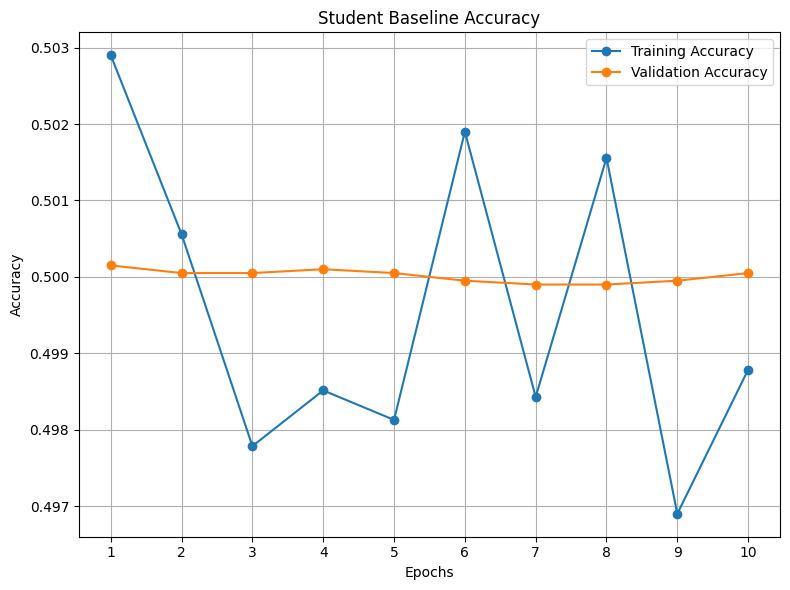

In [36]:
MYPATH_STUDENT_BASELINE='/home/damoon/Desktop/tmp/Sara/AML/Second/FINAL/STUDENT_BASELINE'
student_train_acc = np.load(f"{MYPATH_STUDENT_BASELINE}/student_train_acc.npy")
student_val_acc = np.load(f"{MYPATH_STUDENT_BASELINE}/student_val_acc.npy")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(range(1, len(student_train_acc) + 1), student_train_acc, marker='o', label='Training Accuracy')
ax.plot(range(1, len(student_val_acc) + 1), student_val_acc, marker='o', label='Validation Accuracy')
ax.set_title('Student Baseline Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_xticks(np.arange(1, len(student_train_acc) + 1, 1.0))
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [7]:
!python TEACHER.py


___________________________TEACHER___________________________

Total number of parameters: 25737410

Total number of trainable parameters: 2229378
  0%|                                                    | 0/10 [00:00<?, ?it/s]
[Epoch: 1, Iteration:     1]  training loss: 2.335 training accuracy: 0.500

[Epoch: 1, Iteration:   439]  training loss: 0.539 training accuracy: 0.750

[Epoch: 1, Iteration:   877]  training loss: 0.497 training accuracy: 0.812

[Epoch: 1, Iteration:  1315]  training loss: 0.476 training accuracy: 0.719

[Epoch: 1, Iteration:  1753]  training loss: 0.489 training accuracy: 0.812

______________________________________

Epoch: 1,   TRAINING ACCURACY: 0.747]

[Epoch: 1,  TRAINING LOSS: 0.522]

______________________________________

Saved checkpoint at epoch 1 to /home/damoon/Desktop/tmp/Sara/AML/Second/FINAL/TEACHER/TeacherModel_1.pt

[Epoch: 1, Iteration:     1] validation loss: 0.371 validation accuracy: 0.812

[Epoch: 1, Iteration:   439] validation loss: 0

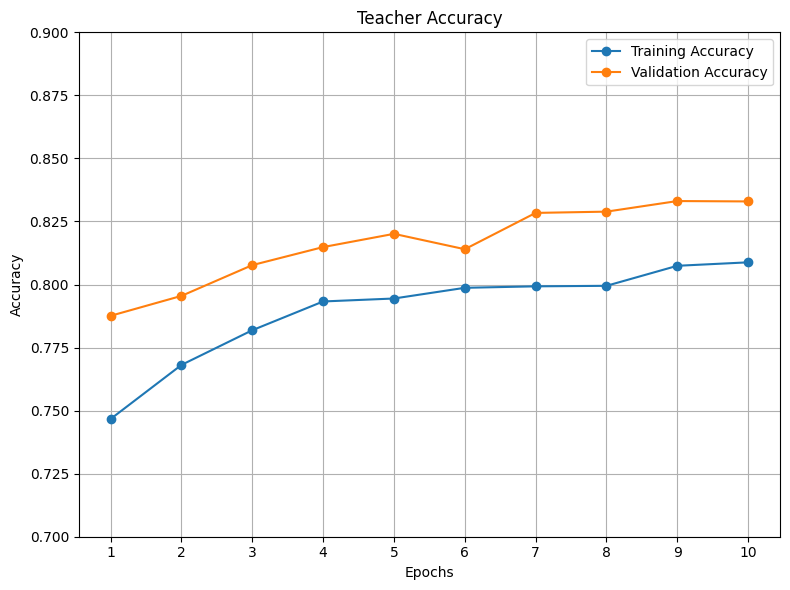

In [37]:
MYPATH_TEACHER='/home/damoon/Desktop/tmp/Sara/AML/Second/FINAL/TEACHER'
teacher_train_loss = np.load(f"{MYPATH_TEACHER}/teacher_train_loss.npy")
teacher_val_loss = np.load(f"{MYPATH_TEACHER}/teacher_val_loss.npy")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(range(1, len(teacher_train_acc) + 1), teacher_train_acc, marker='o', label='Training Accuracy')
ax.plot(range(1, len(teacher_val_acc) + 1), teacher_val_acc, marker='o', label='Validation Accuracy')
ax.set_title('Teacher Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.7,0.9])
ax.set_xticks(np.arange(1, len(teacher_train_acc) + 1, 1.0))
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [10]:
!python Test.py


_______________________TEACHER____________________________________________________________________________________

[Threshold: 0.50, Iteration:     1]  test loss: 0.355 test accuracy: 0.828

[Threshold: 0.50, Iteration:    33]  test loss: 0.367 test accuracy: 0.797

[Threshold: 0.50, Iteration:    65]  test loss: 0.463 test accuracy: 0.766

[Threshold: 0.50, Iteration:    97]  test loss: 0.354 test accuracy: 0.828

[Threshold: 0.50, Iteration:   129]  test loss: 0.398 test accuracy: 0.797
______________________________________

[Threshold: 0.50, TEST ACCURACY: 0.837]

[Threshold: 0.50, TEST LOSS: 0.353]
______________________________________

___________________STUDENT BASELINE______________________________________________________________________________

[Threshold: 0.50, Iteration:     1]  test loss: 0.695 test accuracy: 0.422

[Threshold: 0.50, Iteration:    33]  test loss: 0.695 test accuracy: 0.438

[Threshold: 0.50, Iteration:    65]  test loss: 0.694 test accuracy: 0.469

[Thr

In [11]:
!python DK.py


_______________TEACHER_______________

Total number of parameters: 25737410

Total number of trainable parameters: 0

_______________STUDENT_______________

Total number of parameters: 61462

Total number of trainable parameters: 61462

_____________________________________________________________________________________________________________
  0%|                                                    | 0/10 [00:00<?, ?it/s][Epoch: 1, Iteration:     1]  training loss: 5.629 training accuracy: 0.484
[Epoch: 1, Iteration:   220]  training loss: 0.669 training accuracy: 0.828
[Epoch: 1, Iteration:   439]  training loss: 0.651 training accuracy: 0.750
[Epoch: 1, Iteration:   658]  training loss: 0.800 training accuracy: 0.656
[Epoch: 1, Iteration:   877]  training loss: 0.685 training accuracy: 0.766
______________________________________
Epoch: 1,   TRAINING ACCURACY: 0.717]
[Epoch: 1,  TRAINING LOSS: 0.737]
______________________________________
Saved checkpoint at epoch 1 to /home/damoo

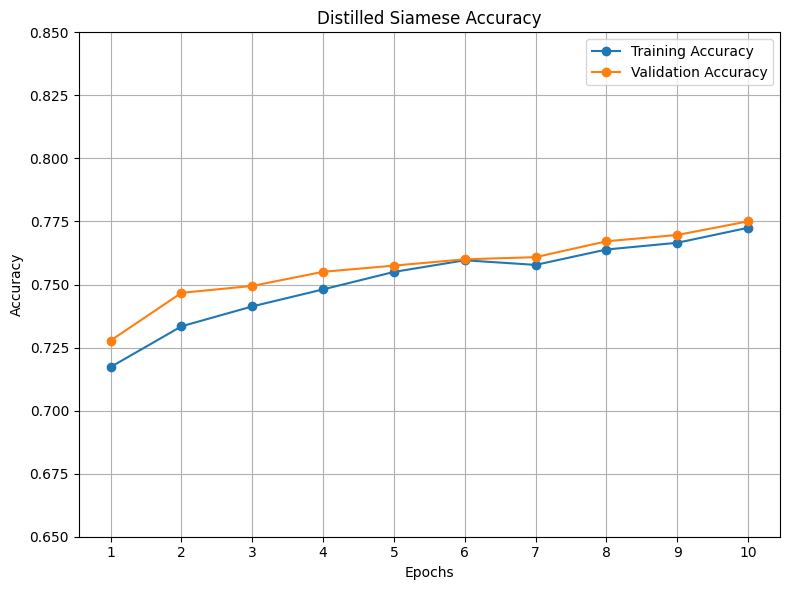

In [38]:
MYPATH_STUDENT_DISTILLED='/home/damoon/Desktop/tmp/Sara/AML/Second/FINAL/STUDENT_DISTILLED'
dk_train_loss = np.load(f"{MYPATH_STUDENT_DISTILLED}/DK_train_loss.npy")
dk_val_loss = np.load(f"{MYPATH_STUDENT_DISTILLED}/DK_val_loss.npy")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(range(1, len(dk_train_acc) + 1), dk_train_acc, marker='o', label='Training Accuracy')
ax.plot(range(1, len(dk_val_acc) + 1), dk_val_acc, marker='o', label='Validation Accuracy')
ax.set_title('Distilled Siamese Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylim([0.65,0.85])
ax.set_ylabel('Accuracy')
ax.set_xticks(np.arange(1, len(dk_train_acc) + 1, 1.0))
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [21]:
!python DK_Test.py


_______________STUDENT DISTILLED_________________________________________________________________________________
[Iteration:     1]  test loss: 0.600 test accuracy: 0.734
[Iteration:    33]  test loss: 0.718 test accuracy: 0.719
[Iteration:    65]  test loss: 0.601 test accuracy: 0.797
[Iteration:    97]  test loss: 0.553 test accuracy: 0.828
[Iteration:   129]  test loss: 0.659 test accuracy: 0.750
______________________________________
TEST ACCURACY: 0.776]
[TEST LOSS: 0.620]
______________________________________


In [3]:
from tabulate import tabulate

table = [["TEACHER", 0.837], ["STUDENT BASELINE", 0.500], ["STUDENT DISTILLED", 0.776]]
headers = ["", "TEST ACCURACY"]

print(tabulate(table, headers, tablefmt="grid"))


+-------------------+-----------------+
|                   |   TEST ACCURACY |
+===================+=================+
| TEACHER           |           0.837 |
+-------------------+-----------------+
| STUDENT BASELINE  |           0.5   |
+-------------------+-----------------+
| STUDENT DISTILLED |           0.776 |
+-------------------+-----------------+
